In [47]:

from urllib.request import urlopen, Request
from bs4 import BeautifulSoup

finviz_url = 'https://finviz.com/quote.ashx?t='
tickers = ['AMZN', 'GOOG', 'NFLX','AAPL']  # ticker is a unique series of letters assigned to a security for trading purposes

news_tables = {}
for ticker in tickers:
    url = finviz_url + ticker

    req = Request(url=url, headers={'user-agent': 'my-app'})

    try:
        response = urlopen(req)
        html = BeautifulSoup(response, 'html')
        news_table = html.find(id='news-table')
        news_tables[ticker] = news_table
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")


DATA CLEANING




In [48]:

parsed_data = []

for ticker, news_table in news_tables.items():
    for row in news_table.findAll('tr'):
        if row.a is not None:
            title = row.a.get_text()
            date_data = row.td.text.split(' ')
            date_data = list(filter(lambda x: x.strip() != '', date_data))  # Remove empty strings
            if len(date_data) == 1:
                time = date_data[0].strip()
            else:
                date = date_data[0].strip()
                time = date_data[1].strip()

            parsed_data.append([ticker, date, time, title])
        else:
            title = "Default value"
            parsed_data.append([ticker, "", "", title])

print(parsed_data)

[['AMZN', 'Today', '03:31AM', 'Most equity markets rise on lingering trader optimism'], ['AMZN', 'Nov-02-25', '11:23PM', 'Shares in Asia advance, led by tech stocks, after another week of gains for Wall St'], ['AMZN', 'Nov-02-25', '10:32PM', 'Amazon launches Rainier data center in Indiana to support AI startup Anthropic'], ['AMZN', 'Nov-02-25', '10:09PM', 'Jim Cramer on Amazon: "This Was Some Darn Quarter"'], ['AMZN', 'Nov-02-25', '03:31PM', "Here's what's worth streaming in November 2025 on Netflix, Hulu, HBO Max and more"], ['AMZN', '', '', 'Default value'], ['AMZN', 'Nov-02-25', '02:13PM', 'Bank of America reconsiders Alphabet stock price target after earnings'], ['AMZN', 'Nov-02-25', '02:06PM', 'Walmart Vs. Costco: Which Retail Stock Is The Better Buy'], ['AMZN', 'Nov-02-25', '01:00PM', "Earnings, Manufacturing Data and Other Can't Miss Items this Week"], ['AMZN', 'Nov-02-25', '12:00PM', "Nvidia is the biggest winner from earnings season - and it hasn't even reported yet"], ['AMZN'

/tmp/ipython-input-1198360739.py:4: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  for row in news_table.findAll('tr'):


DATA CREATING

In [49]:

import pandas as pd
df=pd.DataFrame(parsed_data,columns=['ticker','date','time','title'])
print(df.head())

  ticker       date     time  \
0   AMZN      Today  03:31AM   
1   AMZN  Nov-02-25  11:23PM   
2   AMZN  Nov-02-25  10:32PM   
3   AMZN  Nov-02-25  10:09PM   
4   AMZN  Nov-02-25  03:31PM   

                                               title  
0  Most equity markets rise on lingering trader o...  
1  Shares in Asia advance, led by tech stocks, af...  
2  Amazon launches Rainier data center in Indiana...  
3  Jim Cramer on Amazon: "This Was Some Darn Quar...  
4  Here's what's worth streaming in November 2025...  


USING LEMMATIZATION

In [50]:

import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [51]:

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()


In [52]:

print(df['title'])
corpus=[]

0      Most equity markets rise on lingering trader o...
1      Shares in Asia advance, led by tech stocks, af...
2      Amazon launches Rainier data center in Indiana...
3      Jim Cramer on Amazon: "This Was Some Darn Quar...
4      Here's what's worth streaming in November 2025...
                             ...                        
407    Nvidia partners with South Korean government, ...
408    AAPL Q3 Deep Dive: iPhone and Services Momentu...
409               AP Top Financial News at 5:20 a.m. EDT
410    AP Top Extended Financial Headlines at 5:20 a....
411                           Analyst Report: Apple Inc.
Name: title, Length: 412, dtype: object


In [53]:
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['title'][i])
    review = review.lower()
    review = review.split()

    review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    print(review)
    corpus.append(review)

equity market rise lingering trader optimism
share asia advance led tech stock another week gain wall st
amazon launch rainier data center indiana support ai startup anthropic
jim cramer amazon darn quarter
worth streaming november netflix hulu hbo max
default value
bank america reconsiders alphabet stock price target earnings
walmart v costco retail stock better buy
earnings manufacturing data miss item week
nvidia biggest winner earnings season even reported yet
warren buffett billion portfolio invested artificial intelligence ai stock
amazon say ai shopping assistant rufus effective pace pull extra billion sale
little concerning crucial consumer group pressure warning sign u economy
aws outage show crypto keep relying centralized infrastructure
best stock buy right alibaba v amazon
sequoia capital fund aim back next amazon ai era early stage startup investment across globe
default value
nvidia worth trillion here mean market
ibm stock outperforming nvidia year share buy
anyone catch

In [54]:

print(corpus)

['equity market rise lingering trader optimism', 'share asia advance led tech stock another week gain wall st', 'amazon launch rainier data center indiana support ai startup anthropic', 'jim cramer amazon darn quarter', 'worth streaming november netflix hulu hbo max', 'default value', 'bank america reconsiders alphabet stock price target earnings', 'walmart v costco retail stock better buy', 'earnings manufacturing data miss item week', 'nvidia biggest winner earnings season even reported yet', 'warren buffett billion portfolio invested artificial intelligence ai stock', 'amazon say ai shopping assistant rufus effective pace pull extra billion sale', 'little concerning crucial consumer group pressure warning sign u economy', 'aws outage show crypto keep relying centralized infrastructure', 'best stock buy right alibaba v amazon', 'sequoia capital fund aim back next amazon ai era early stage startup investment across globe', 'default value', 'nvidia worth trillion here mean market', 'ib

CREATING THE BAG OF WORDS MODEL

In [55]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()


In [56]:

print(X)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [57]:
X.shape

(412, 941)

USING K-MEANS

In [58]:

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

# Perform K-Means clustering
k = 3
kmeans = KMeans(n_clusters=k)
cluster_labels = kmeans.fit_predict(X)

cluster_sentiment = {
    0: "positive",
    1: "negative",
    2: "neutral"
}

# Print cluster labels
print(cluster_labels)


[2 2 2 2 1 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2
 0 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2 2 0 2 0 2 0 2 2 2 2 2 0 2 2 2 2
 2 0 2 0 2 0 0 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 0 2 2 2 0 2 0 2 2 2 2 2 2 2
 2 0 2 2 2 2 2 0 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 1 2 0 2 2 0 0
 0 0 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 1 0 0 0 2 2 2 2 2 2 2 2 2 1 0 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 0 2 2 1 2 2 1 1 2 1 2 2 1 2 1 2 1 1 0
 2 1 1 2 1 1 1 2 1 2 1 1 1 1 1 1 2 1 1 1 1 2 2 1 1 2 1 1 1 1 1 1 1 2 2 1 1
 1 1 1 2 1 1 1 1 1 1 2 1 2 2 1 2 2 1 1 2 1 1 1 1 0 1 1 1 1 1 1 1 1 2 1 2 1
 2 0 2 1 1 2 2 1 1 1 1 1 1 2 2 2 2 2 2 2 1 2 2 2 2 2 0 2 0 2 2 2 0 2 2 2 2
 2 2 2 2 0 2 0 2 2 2 2 0 0 2 2 2 0 2 0 0 0 0 0 1 2 2 0 2 2 2 0 2 0 2 2 0 2
 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 2 2 2 2 0 0 2 2 2 1 2 2 1 2 0 2
 2 2 2 2 2]


In [59]:

# Assign sentiments to sentences based on cluster labels
sentiment_predictions = [cluster_sentiment[label] for label in cluster_labels]

In [60]:
# Display sentences and predicted sentiments
for sentence, sentiment in zip(corpus, sentiment_predictions):
    print(f"Sentence: {sentence} - Predicted Sentiment from k-means: {sentiment}")

Sentence: equity market rise lingering trader optimism - Predicted Sentiment from k-means: neutral
Sentence: share asia advance led tech stock another week gain wall st - Predicted Sentiment from k-means: neutral
Sentence: amazon launch rainier data center indiana support ai startup anthropic - Predicted Sentiment from k-means: neutral
Sentence: jim cramer amazon darn quarter - Predicted Sentiment from k-means: neutral
Sentence: worth streaming november netflix hulu hbo max - Predicted Sentiment from k-means: negative
Sentence: default value - Predicted Sentiment from k-means: neutral
Sentence: bank america reconsiders alphabet stock price target earnings - Predicted Sentiment from k-means: neutral
Sentence: walmart v costco retail stock better buy - Predicted Sentiment from k-means: neutral
Sentence: earnings manufacturing data miss item week - Predicted Sentiment from k-means: positive
Sentence: nvidia biggest winner earnings season even reported yet - Predicted Sentiment from k-mean

IMPLEMENTATION OF SENTIMENTAL ANALYSIS (USING VADER TOOL OF NLTK)

In [61]:
!pip install nltk
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

In [62]:

df=pd.DataFrame(parsed_data,columns=['ticker','date','time','title'])
print(df.head())

  ticker       date     time  \
0   AMZN      Today  03:31AM   
1   AMZN  Nov-02-25  11:23PM   
2   AMZN  Nov-02-25  10:32PM   
3   AMZN  Nov-02-25  10:09PM   
4   AMZN  Nov-02-25  03:31PM   

                                               title  
0  Most equity markets rise on lingering trader o...  
1  Shares in Asia advance, led by tech stocks, af...  
2  Amazon launches Rainier data center in Indiana...  
3  Jim Cramer on Amazon: "This Was Some Darn Quar...  
4  Here's what's worth streaming in November 2025...  


In [63]:
nltk.download('vader_lexicon')
vader = SentimentIntensityAnalyzer()
print(df['title'])


0      Most equity markets rise on lingering trader o...
1      Shares in Asia advance, led by tech stocks, af...
2      Amazon launches Rainier data center in Indiana...
3      Jim Cramer on Amazon: "This Was Some Darn Quar...
4      Here's what's worth streaming in November 2025...
                             ...                        
407    Nvidia partners with South Korean government, ...
408    AAPL Q3 Deep Dive: iPhone and Services Momentu...
409               AP Top Financial News at 5:20 a.m. EDT
410    AP Top Extended Financial Headlines at 5:20 a....
411                           Analyst Report: Apple Inc.
Name: title, Length: 412, dtype: object


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [64]:
f=lambda title: vader.polarity_scores(title)['compound']
df['compound']=df['title'].apply(f)
print(df.head())


  ticker       date     time  \
0   AMZN      Today  03:31AM   
1   AMZN  Nov-02-25  11:23PM   
2   AMZN  Nov-02-25  10:32PM   
3   AMZN  Nov-02-25  10:09PM   
4   AMZN  Nov-02-25  03:31PM   

                                               title  compound  
0  Most equity markets rise on lingering trader o...    0.5423  
1  Shares in Asia advance, led by tech stocks, af...    0.5574  
2  Amazon launches Rainier data center in Indiana...    0.5267  
3  Jim Cramer on Amazon: "This Was Some Darn Quar...    0.1779  
4  Here's what's worth streaming in November 2025...    0.2263  


VISUALISATION OF DATA

In [65]:
import matplotlib.pyplot as plt
from datetime import datetime

df['date'] = df['date'].replace('Today', datetime.now().strftime('%Y-%m-%d'))
df['date'] = df['date'].replace('', pd.NaT)

df['date'] = pd.to_datetime(df['date'], format='%b-%d-%y', errors='coerce')

plt.figure(figsize=(10,8))
mean_df = df.groupby(['ticker','date'])['compound'].mean()
print(mean_df)

ticker  date      
AAPL    2025-10-30    0.000000
        2025-10-31    0.189500
        2025-11-01    0.219700
        2025-11-02    0.215913
AMZN    2025-10-31    0.225269
        2025-11-01    0.146935
        2025-11-02    0.189908
GOOG    2025-10-30    0.265310
        2025-10-31    0.145525
        2025-11-01    0.211690
        2025-11-02    0.002200
NFLX    2025-10-24    0.099660
        2025-10-25   -0.059300
        2025-10-26    0.339643
        2025-10-27    0.096900
        2025-10-28    0.027880
        2025-10-29    0.089300
        2025-10-30    0.190211
        2025-10-31    0.082091
        2025-11-01    0.079550
        2025-11-02    0.205638
Name: compound, dtype: float64


<Figure size 1000x800 with 0 Axes>

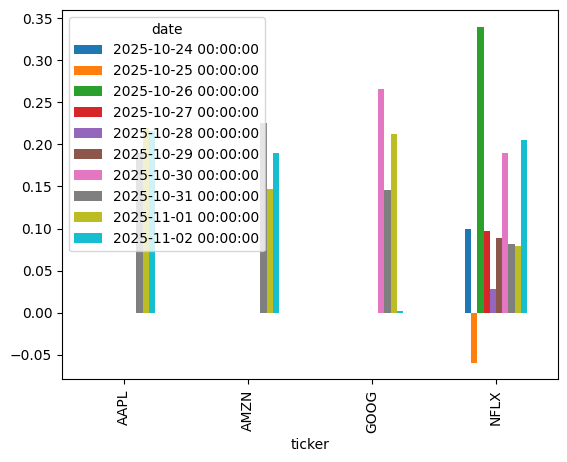

In [66]:
mean_df=mean_df.unstack()
mean_df.plot(kind='bar')
plt.show()

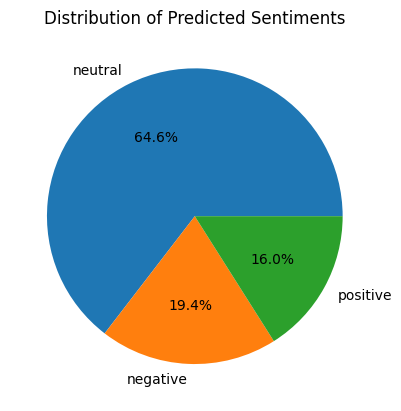

In [67]:

sentiment_counts = pd.Series(sentiment_predictions).value_counts()

plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Predicted Sentiments')
plt.show()


WORD EMBEDDING TECHNIQUES USING EMBEDDING LAYER IN KERAS

In [68]:


from tensorflow.keras.preprocessing.text import one_hot

In [69]:


#instance for title column if df
sent=df['title']

In [70]:

sent

,title
0,Most equity markets rise on lingering trader o...
1,"Shares in Asia advance, led by tech stocks, af..."
2,Amazon launches Rainier data center in Indiana...
3,"Jim Cramer on Amazon: ""This Was Some Darn Quar..."
4,Here's what's worth streaming in November 2025...
...,...
407,"Nvidia partners with South Korean government, ..."
408,AAPL Q3 Deep Dive: iPhone and Services Momentu...
409,AP Top Financial News at 5:20 a.m. EDT
410,AP Top Extended Financial Headlines at 5:20 a....


In [71]:

## Vocabulary Size
voc_size=10000


ONE HOT REPRESENTATION

In [72]:

one_hot_repr=[one_hot(words,voc_size) for words in sent]
print(one_hot_repr)

[[4417, 3242, 7781, 9793, 1947, 887, 1141, 9271], [7199, 52, 2607, 8718, 4325, 6991, 6850, 8626, 2204, 6283, 9941, 3790, 5862, 227, 3292, 6052], [6899, 1444, 8262, 3689, 4648, 52, 4242, 9844, 9502, 5337, 8436, 1162], [4935, 2456, 1947, 6899, 1152, 7807, 9751, 7526, 2148], [1592, 9243, 667, 8138, 52, 1546, 9860, 1947, 1543, 7494, 1488, 1724, 3724, 8822], [5700, 7842], [2703, 3790, 6391, 9120, 5963, 2641, 161, 268, 2204, 5039], [794, 6917, 955, 6298, 6359, 2641, 6901, 3689, 6182, 8601], [5039, 8176, 3689, 3724, 4521, 3131, 7476, 3111, 1152, 9941], [6829, 6901, 3689, 3597, 569, 6203, 5039, 2525, 3724, 7058, 5046, 8316, 2580, 6782], [320, 3790, 2304, 2674, 8275, 1789, 660, 6901, 8170, 52, 140, 325, 5433, 5337, 8626], [6899, 7837, 2174, 5337, 9597, 7197, 5684, 6901, 8058, 3, 2174, 1947, 4981, 9844, 9915, 52, 875, 4694, 1497, 1789, 52, 7148], [6945, 4415, 5479, 140, 8896, 3916, 6863, 96, 6392, 5121, 5478, 6510, 9810, 227, 1212, 3578], [3689, 7719, 605, 1791, 9831, 9755, 3131, 1901, 2304, 194

WORD EMBEDDING REPRESENTATION

In [73]:


from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
import numpy as np

In [74]:
sent_length=20
embedded_docs=pad_sequences(one_hot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ...  887 1141 9271]
 [   0    0    0 ...  227 3292 6052]
 [   0    0    0 ... 5337 8436 1162]
 ...
 [   0    0    0 ... 5478 1228 9987]
 [   0    0    0 ... 5478 1228 9987]
 [   0    0    0 ... 9345 1051 8591]]


In [75]:

dim=10

In [76]:

embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [77]:

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [78]:

print(model.predict(embedded_docs))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  
[[[ 0.02484162 -0.03488481  0.00305313 ... -0.02719652 -0.03275128
    0.01610881]
  [ 0.02484162 -0.03488481  0.00305313 ... -0.02719652 -0.03275128
    0.01610881]
  [ 0.02484162 -0.03488481  0.00305313 ... -0.02719652 -0.03275128
    0.01610881]
  ...
  [-0.00947133  0.03822032 -0.00227543 ...  0.01151491  0.03974977
    0.00126125]
  [ 0.03877837  0.03083954 -0.04997353 ...  0.0068861   0.01279551
    0.04486603]
  [-0.04988086  0.02431008 -0.02018323 ...  0.01291821  0.01494962
    0.02026926]]

 [[ 0.02484162 -0.03488481  0.00305313 ... -0.02719652 -0.03275128
    0.01610881]
  [ 0.02484162 -0.03488481  0.00305313 ... -0.02719652 -0.03275128
    0.01610881]
  [ 0.02484162 -0.03488481  0.00305313 ... -0.02719652 -0.03275128
    0.01610881]
  ...
  [-0.00395541  0.01173903  0.01287481 ... -0.03290174 -0.0051989
   -0.0359306 ]
  [ 0.04672435 -0.0123158  -0.04119394 ... -0.03429812 -0.04683312
    0.02987064]
  [ 0.02921791 -0.01307891  0.022

In [79]:


embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0, 4417, 3242, 7781, 9793, 1947,  887, 1141, 9271], dtype=int32)

In [80]:

print(model.predict(embedded_docs)[0])

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
[[ 2.48416178e-02 -3.48848104e-02  3.05312872e-03  2.16225721e-02
   2.34293938e-03  2.26736329e-02 -4.02161479e-02 -2.30117682e-02
  -3.75391468e-02 -6.42813742e-04  2.28205062e-02 -2.09806804e-02
   2.03813240e-03  5.83548471e-03  3.60854007e-02 -2.67055165e-02
  -2.29921341e-02 -4.22854796e-02  4.45208438e-02 -2.37537548e-03
   1.53023638e-02 -1.75374858e-02 -3.04252263e-02  4.66910340e-02
  -4.05678749e-02 -3.41514573e-02 -4.54327352e-02  2.29748003e-02
  -5.20135090e-03 -2.43823882e-02  4.43468727e-02 -3.83879319e-02
  -2.14693304e-02  2.66487524e-03 -4.83883880e-02 -1.26786456e-02
  -1.87403187e-02 -2.71965154e-02 -3.27512845e-02  1.61088146e-02]
 [ 2.48416178e-02 -3.48848104e-02  3.05312872e-03  2.16225721e-02
   2.34293938e-03  2.26736329e-02 -4.02161479e-02 -2.30117682e-02
  -3.75391468e-02 -6.42813742e-04  2.28205062e-02 -2.09806804e-02
   2.03813240e-03  5.83548471e-03  3.60854007e-02 -2.67055165e-02
  -2.29921341e-02 -4.22854796e-02  

RECURRENT NEURAL NETWORK (RNN)

In [81]:

import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [82]:
# Define the LSTM model
model = Sequential()
model.add(Embedding(input_dim=voc_size, output_dim=embedding_vector_features, input_length=sent_length))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(3, activation='softmax'))  # 3 classes for positive, negative, and neutral
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
one_hot_labels = to_categorical(cluster_labels, num_classes=3)
y = one_hot_labels
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [83]:

len(embedded_docs),y.shape
X_final=np.array(embedded_docs)
Y_final=np.array(y)
X_final.shape,Y_final.shape
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.33, random_state=42)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 487ms/step - accuracy: 0.5290 - loss: 1.0849 - val_accuracy: 0.7206 - val_loss: 0.9704
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.6267 - loss: 0.9835 - val_accuracy: 0.7206 - val_loss: 0.7874
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 175ms/step - accuracy: 0.6141 - loss: 0.9220 - val_accuracy: 0.7206 - val_loss: 0.7977
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.5987 - loss: 0.9318 - val_accuracy: 0.7206 - val_loss: 0.8490
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5911 - loss: 0.9247 - val_accuracy: 0.7206 - val_loss: 0.8086
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.6083 - loss: 0.8683 - val_accuracy: 0.7206 - val_loss: 0.7323
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.6087 - loss: 0.8277 - val_accuracy: 0.7206 - val_loss: 0.6854
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.6105 - loss: 0.7474 - val_accuracy: 0.7721 - val_loss: 0.628

In [84]:
predicted_sentiments = []
for sentence in sent:
    sentence_encoded = [one_hot(sentence, voc_size)]
    sentence_padded = pad_sequences(sentence_encoded, maxlen=sent_length, padding='pre')

    # Using trained model to predict sentiment
    predicted_probabilities = model.predict(sentence_padded)

    # Converting the predicted probabilities to a sentiment label
    predicted_sentiment_label = np.argmax(predicted_probabilities)

    # Maping the numeric sentiment label to its corresponding sentiment class
    sentiment_classes = ['positive', 'negative', 'neutral']
    predicted_sentiment = sentiment_classes[predicted_sentiment_label]

    # Append the predicted sentiment to the list
    predicted_sentiments.append(predicted_sentiment)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━

In [85]:

# Print the predicted sentiments for all sentences
for sentence, sentiment in zip(sent, predicted_sentiments):
    print(f"Sentence: {sentence} - Predicted Sentiment from RNN: {sentiment}")

Sentence: Most equity markets rise on lingering trader optimism - Predicted Sentiment from RNN: negative
Sentence: Shares in Asia advance, led by tech stocks, after another week of gains for Wall St - Predicted Sentiment from RNN: neutral
Sentence: Amazon launches Rainier data center in Indiana to support AI startup Anthropic - Predicted Sentiment from RNN: neutral
Sentence: Jim Cramer on Amazon: "This Was Some Darn Quarter" - Predicted Sentiment from RNN: neutral
Sentence: Here's what's worth streaming in November 2025 on Netflix, Hulu, HBO Max and more - Predicted Sentiment from RNN: negative
Sentence: Default value - Predicted Sentiment from RNN: negative
Sentence: Bank of America reconsiders Alphabet stock price target after earnings - Predicted Sentiment from RNN: neutral
Sentence: Walmart Vs. Costco: Which Retail Stock Is The Better Buy - Predicted Sentiment from RNN: neutral
Sentence: Earnings, Manufacturing Data and Other Can't Miss Items this Week - Predicted Sentiment from RN

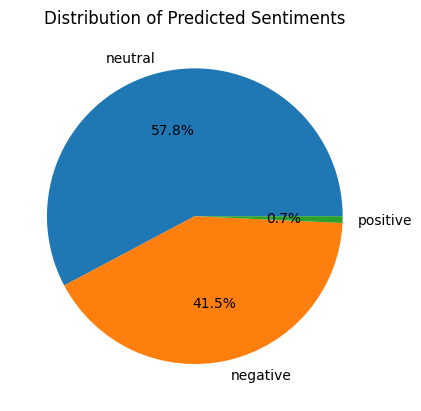

In [86]:

sentiment_counts = pd.Series(predicted_sentiments).value_counts()

plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Predicted Sentiments')
plt.show()

PERFORMANCE DIVERGENCE CHECK BETWEEN BOTH MODELS (RNN AND K-MEANS)

In [87]:
sentences = sent
kmeans_predictions = sentiment_predictions
rnn_predictions = predicted_sentiments

# Create a DataFrame
data = {
    'Sentence': sentences,
    'K-means Prediction': kmeans_predictions,
    'RNN Prediction': rnn_predictions
}

df = pd.DataFrame(data)
df['Predictions Match'] = df['K-means Prediction'] == df['RNN Prediction']
# Display the DataFrame
print(df)

                                              Sentence K-means Prediction  \
0    Most equity markets rise on lingering trader o...            neutral   
1    Shares in Asia advance, led by tech stocks, af...            neutral   
2    Amazon launches Rainier data center in Indiana...            neutral   
3    Jim Cramer on Amazon: "This Was Some Darn Quar...            neutral   
4    Here's what's worth streaming in November 2025...           negative   
..                                                 ...                ...   
407  Nvidia partners with South Korean government, ...            neutral   
408  AAPL Q3 Deep Dive: iPhone and Services Momentu...            neutral   
409             AP Top Financial News at 5:20 a.m. EDT            neutral   
410  AP Top Extended Financial Headlines at 5:20 a....            neutral   
411                         Analyst Report: Apple Inc.            neutral   

    RNN Prediction  Predictions Match  
0         negative              Fal

In [88]:

mismatched_count = df['Predictions Match'].value_counts()
print(mismatched_count)

Predictions Match
True     316
False     96
Name: count, dtype: int64


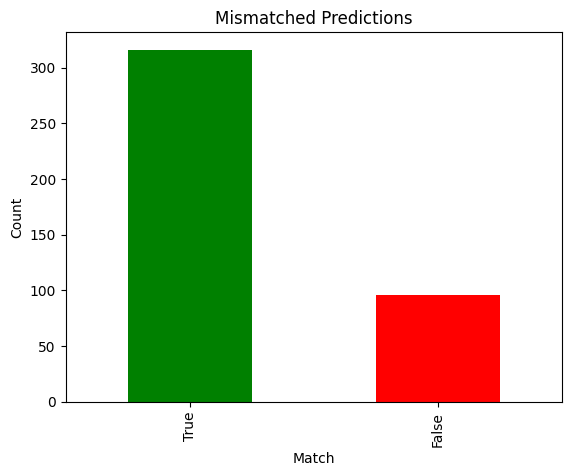

In [89]:


mismatched_count.plot(kind='bar', color=['green', 'red'])

# Customize the plot
plt.title('Mismatched Predictions')
plt.xlabel('Match')
plt.ylabel('Count')

# Show the plot
plt.show()